In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('World Happiness Report.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
#dropping two columns 
df.drop(['Country','Region','Happiness Rank'],axis=1,inplace=True)

In [7]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Visualization

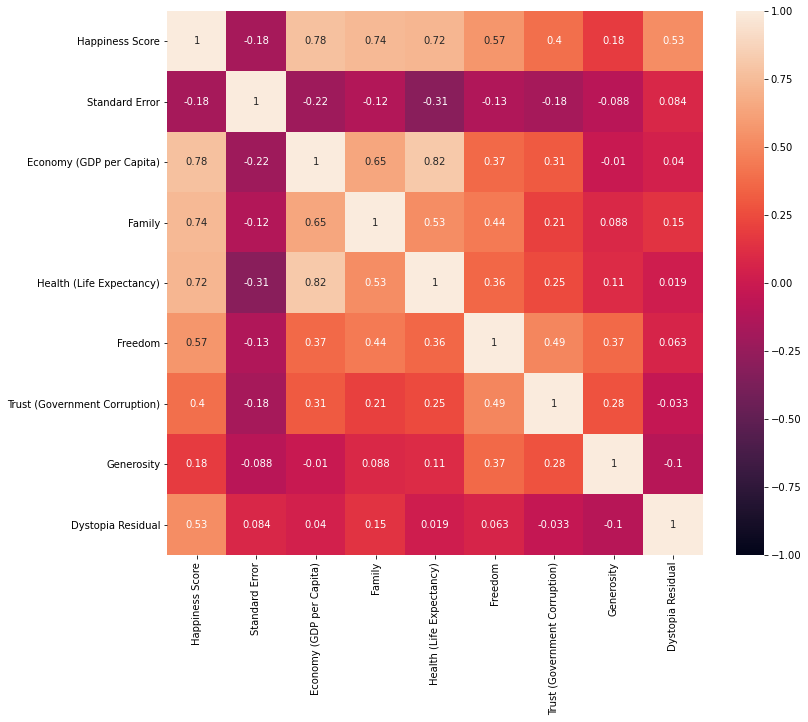

In [8]:
#lets check the correlation between the columns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,vmin=-1.0,vmax=1.0)
plt.show()

In [9]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

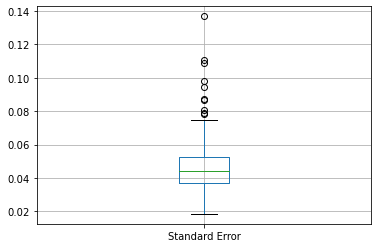

In [10]:
df.boxplot(column="Standard Error")

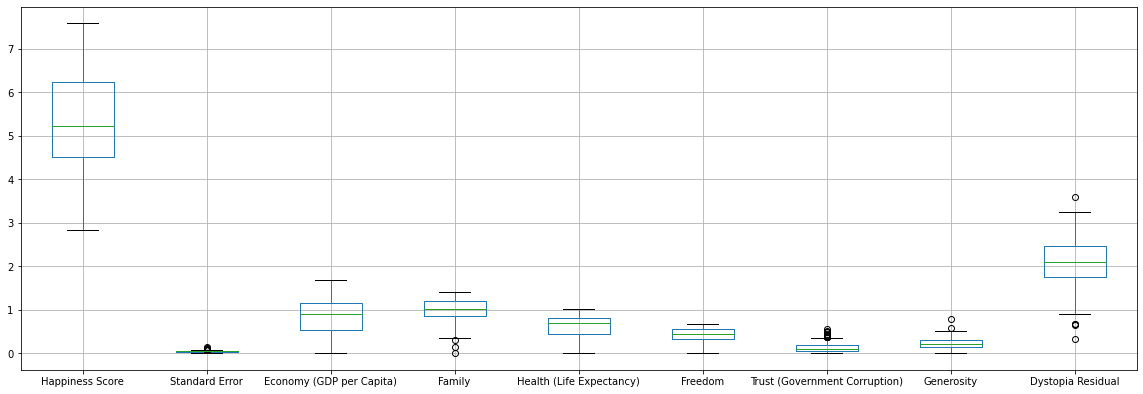

In [11]:
#plotting to check outliers for data cleaning
df.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [12]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [13]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [14]:
z[40][1]

3.5727739331415806

In [15]:
z[157][3]

3.1347248549706186

In [19]:
###lets check the presence of outliers


dfnew=df[(z<3).all(axis=1)]



In [20]:
#shape after removing outliers
dfnew.shape

(149, 9)

In [21]:
df.shape

(158, 9)

In [22]:
df=dfnew

In [23]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [24]:
#spliting the data into x and y
y=df['Happiness Score']
x=df.drop('Happiness Score',axis=1)

In [25]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [26]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [27]:
x.skew()

Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [29]:
#lets remove the skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [30]:
x

array([[-0.95033703,  1.49245411,  1.65888018, ...,  1.81762512,
         0.65957854,  0.75525527],
       [ 0.37856182,  1.19406711,  2.009125  , ...,  0.32967609,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078531, ...,  1.95339954,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738872, ..., -0.19284338,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044288, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.9064101 , ..., -0.14727362,
        -0.17248609, -0.55359235]])

In [33]:
#Scaling of data
sc=StandardScaler()
x=sc.fit_transform(x)
x


array([[-0.95033703,  1.49245411,  1.65888018, ...,  1.81762512,
         0.65957854,  0.75525527],
       [ 0.37856182,  1.19406711,  2.009125  , ...,  0.32967609,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078531, ...,  1.95339954,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738872, ..., -0.19284338,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044288, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.9064101 , ..., -0.14727362,
        -0.17248609, -0.55359235]])

In [42]:
#train_test_split to perform further operations
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.40,random_state=50)

In [43]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [44]:
lm.coef_

array([-0.00348478,  0.40436679,  0.24362391,  0.2480664 ,  0.14917879,
        0.07718357,  0.10699903,  0.50500833])

In [45]:
lm.intercept_

5.432929230416342

In [41]:
lm.score(x_train,y_train)

0.9937425046201984

In [46]:
pred=lm.predict(x_test)


In [50]:
print("predicted Happiness Score:",pred)



predicted Happiness Score: [5.74190124 5.01592993 5.84369976 6.89755593 4.59077616 7.04490072
 3.87576313 6.79831554 4.33816396 7.33165822 3.55096087 5.78675519
 5.69568439 4.3022675  6.85872345 3.88142743 4.63539823 5.08692413
 5.11952822 4.0938456  3.79397827 7.20423182 5.15381676 5.20367009
 4.86869035 5.07038845 4.43612513 4.95224565 3.75166759 5.75373042
 4.66007008 5.29464376 6.49955937 6.81069482 7.60754491 5.95389482
 5.0558583  7.34302628 6.00858223 5.73480596 4.71787018 7.22034963
 4.82404806 7.0337761  6.03522814 7.0548256  5.78610049 4.44359115
 5.24297986 7.41136709 6.9270715  5.07424435 3.62448988 4.89785394
 5.85509034 6.70487188 6.18367749 4.39137317 3.20690076 5.57234106]


In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [53]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

error:
mean absolute error: 0.07306239551710424
Mean squared error: 0.008193889318963395
0.9938359360740272
